In [2]:
x=1

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [4]:
import SEACells

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

In [7]:
def plot_sea_cells(
    ad,
    color_df,
    color_key,
    key="X_umap",
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="Set2",
    figsize=(5, 5),
    SEACell_size=20,
    cell_size=10,
):
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    
    mcs = umap.groupby("SEACell").mean()
    mcs = mcs.join(color_df)
    mcs = mcs.reset_index()
    # plt.figure(figsize=figsize)
    
    fig, ax = plt.subplots()
    sns.scatterplot(
        x=0, y=1, color="gray", data=umap, s=cell_size, cmap=cmap, legend=None
    )
    g = sns.scatterplot(
        x=0,
        y=1,
        s=SEACell_size,
        hue=f"{color_key}",
        data=mcs,
        cmap=cmap,
        edgecolor="black",
        linewidth=1,
        legend=None,
    )
    #g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'Average {color_key} expression per meta cell.')
    norm = plt.Normalize(mcs[f'{color_key}'].min(), mcs[f'{color_key}'].max())
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
    ax.figure.colorbar(sm, cax=cax, label=f"{color_key}")
    plt.show()

In [8]:
adata = sc.read('../data/multigrate_mil/hlca_healthy_ipf_embed_balanced/b2e8c62cf5_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [9]:
adata.obsm['X'] = adata.X.copy()

In [10]:
adata.obs['cell_attn'] = np.mean(adata.obs[['cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4']], axis=1)

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [12]:
np.unique(adata.obs['lung_condition_coarse'])

array(['Healthy', 'IPF'], dtype=object)

In [13]:
healthy = adata[adata.obs['lung_condition_coarse'] == 'Healthy'].copy()
ipf = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


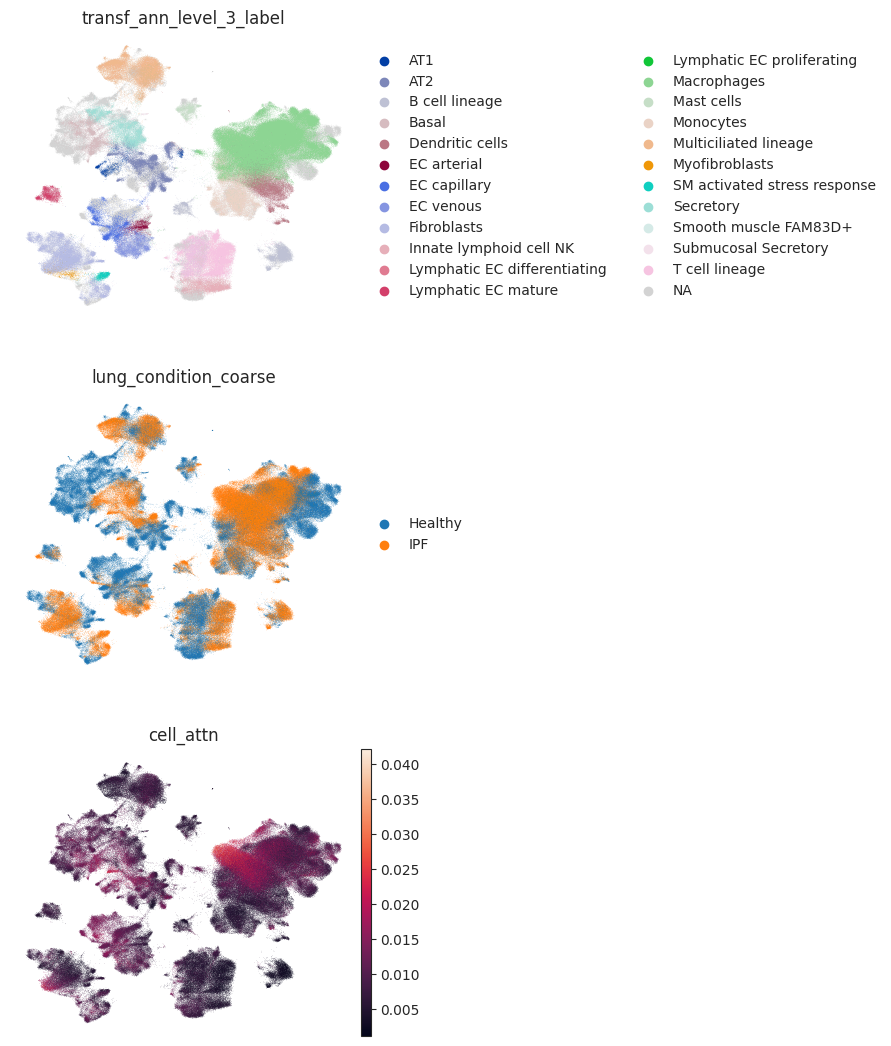

In [14]:
sc.pl.umap(adata, color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn'], ncols=1, frameon=False)

# Random subset

In [14]:
sc.pp.subsample(healthy, n_obs=10000)
sc.pp.subsample(ipf, n_obs=10000)
adata = ad.concat([healthy, ipf])
adata

AnnData object with n_obs × n_vars = 20000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

# Subset IPF to top 10k cells with highest attn scores

In [15]:
ipf_top = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()

In [16]:
ipf_top

AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [17]:
ipf_top = ipf_top[ipf_top.obs[['cell_attn']].sort_values(by='cell_attn', ascending=False).index][:10000]
ipf_top

View of AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_a

In [18]:
sc.pp.subsample(ipf_top, fraction=1)
ipf_top

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

# healthy

In [19]:
healthy

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [20]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [21]:
model = SEACells.core.SEACells(
    healthy, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [22]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


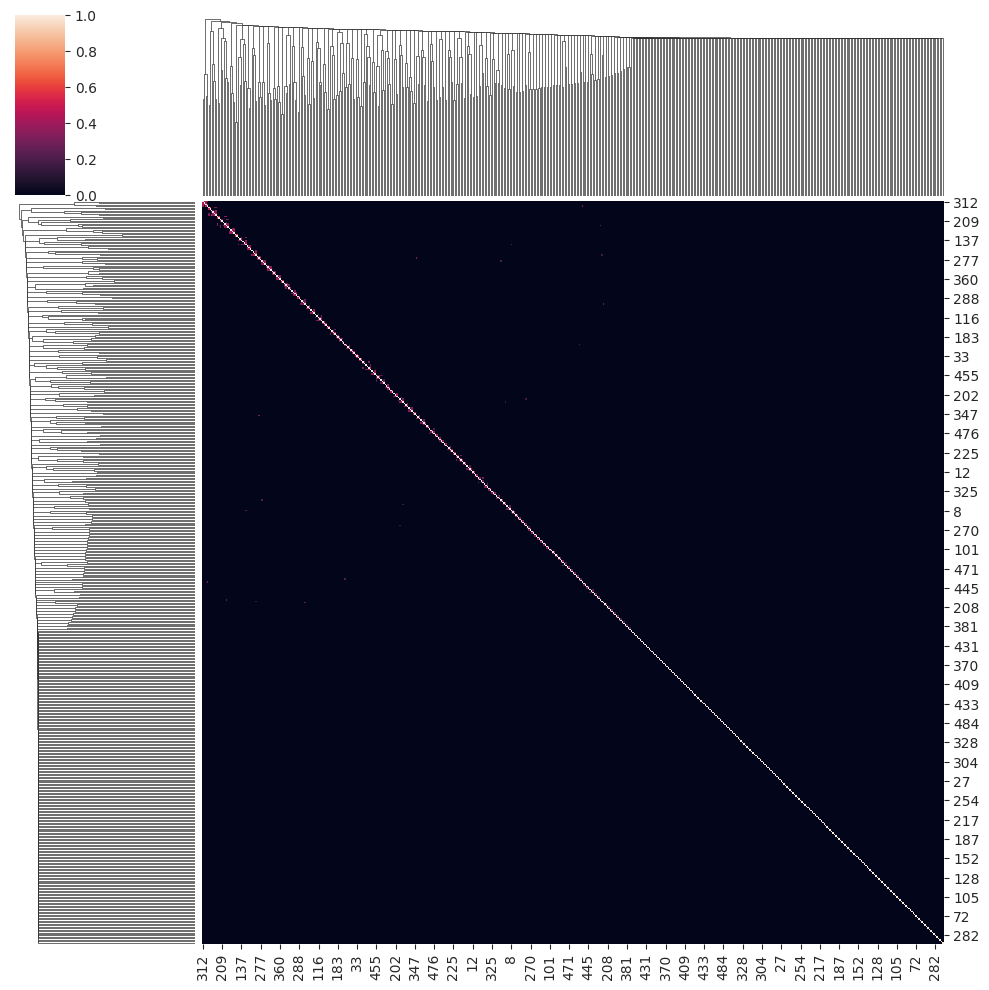

In [23]:
sns.clustermap(M.toarray()[:500,:500])

In [24]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 91 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 19/19 [00:00<00:00, 119.61it/s]

Selecting 9 cells from greedy initialization.


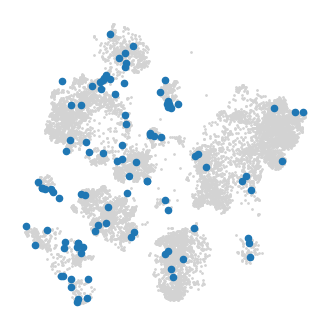

In [25]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(healthy, model)

In [26]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00178
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Starting iteration 50.
Completed iteration 50.
Converged after 50 iterations.
CPU times: user 11min 48s, sys: 12min 16s, total: 24min 4s
Wall time: 7min 58s


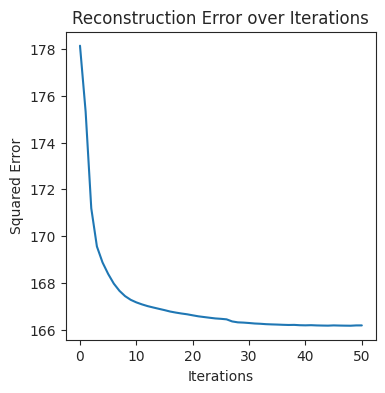

In [27]:
# Check for convergence 
model.plot_convergence()

In [28]:
healthy.write('../data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')

/tmp/ipykernel_1364634/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


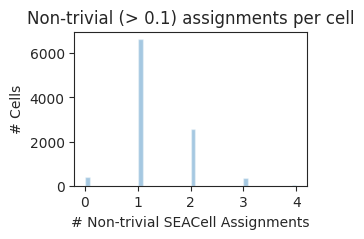

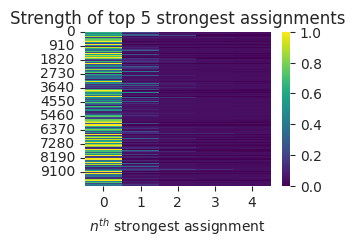

In [29]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [30]:
labels,weights = model.get_soft_assignments()

In [31]:
mean_attn_score_per_seacell = healthy.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

,cell_attn
SEACell,
SEACell-0,0.004393
SEACell-1,0.006094
SEACell-2,0.008268
SEACell-3,0.009804
SEACell-4,0.007566
...,...
SEACell-95,0.006358
SEACell-96,0.007766
SEACell-97,0.011820


In [32]:
SEACell_ad = SEACells.core.summarize_by_SEACell(healthy, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 63.58it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [33]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


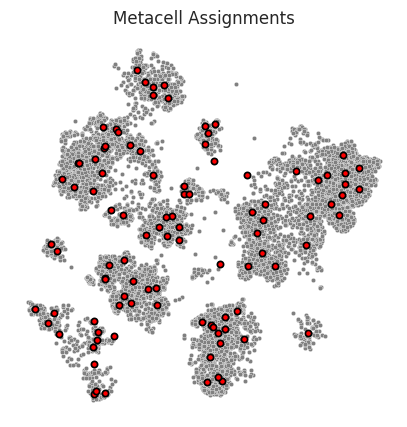

In [34]:
SEACells.plot.plot_2D(healthy, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


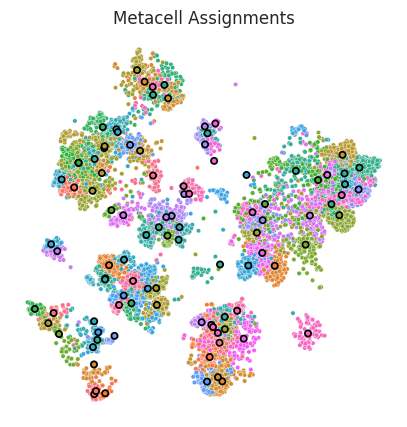

In [35]:
SEACells.plot.plot_2D(healthy, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


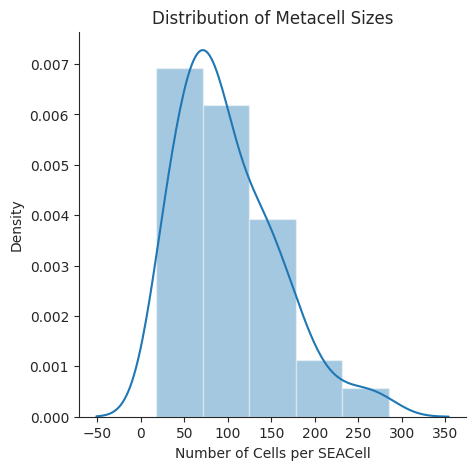

,size
SEACell,
SEACell-0,156
SEACell-1,30
SEACell-2,25
SEACell-3,25
SEACell-4,167
...,...
SEACell-95,73
SEACell-96,60
SEACell-97,82


In [36]:
SEACells.plot.plot_SEACell_sizes(healthy, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


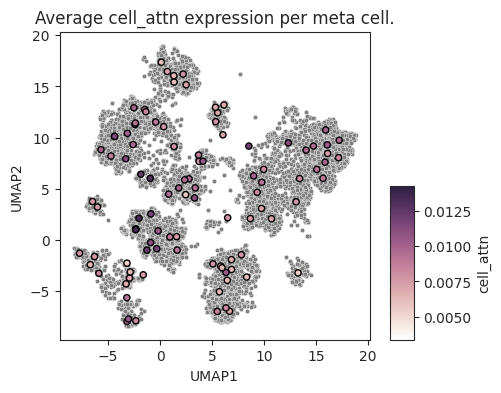

In [37]:
plot_sea_cells(healthy, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


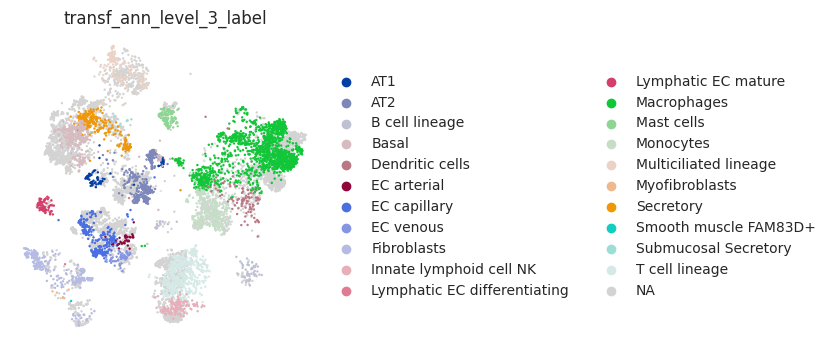

In [38]:
sc.pl.umap(healthy, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [39]:
healthy.write('../data/analysis/hlca_healthy_ipf_embed_balanced/healthy_random_subset10k_seacells.h5ad')

# ipf

In [40]:
ipf

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [41]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [42]:
model = SEACells.core.SEACells(
    ipf, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [43]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


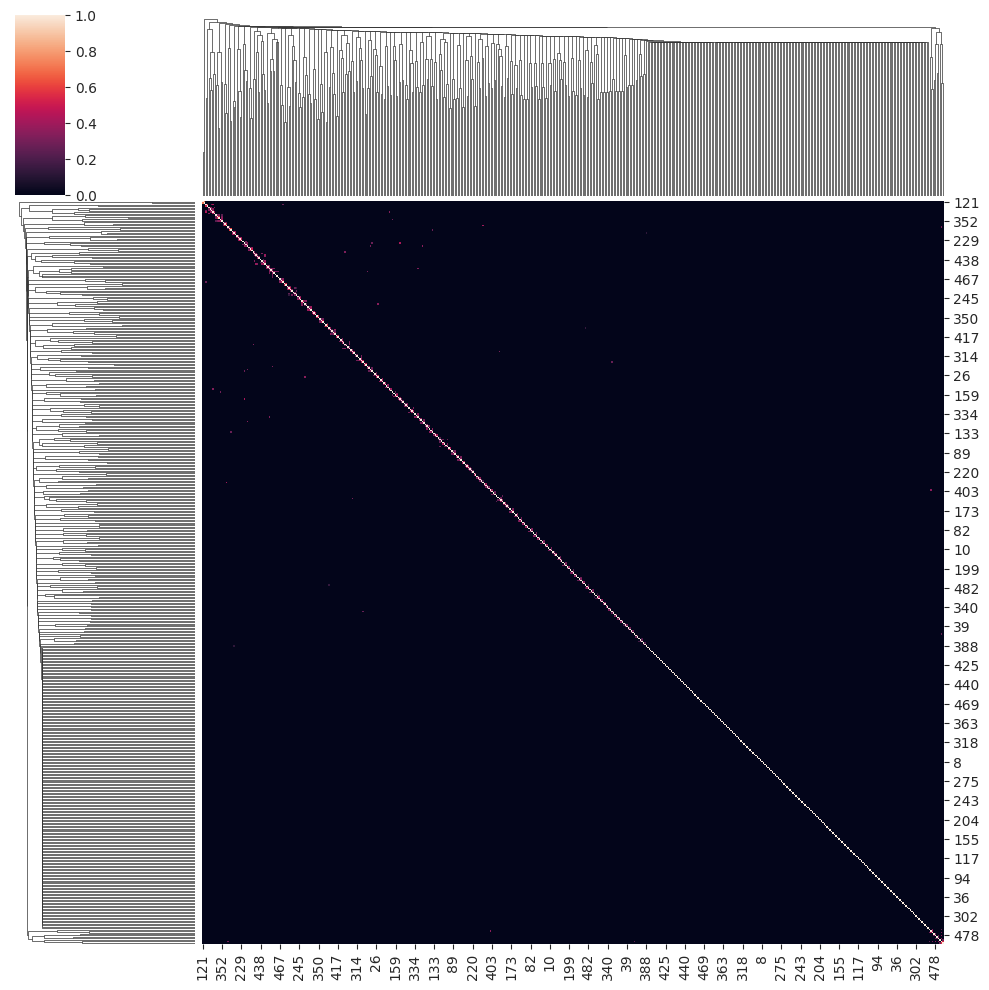

In [44]:
sns.clustermap(M.toarray()[:500,:500])

In [45]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 91 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 19/19 [00:00<00:00, 111.11it/s]

Selecting 9 cells from greedy initialization.


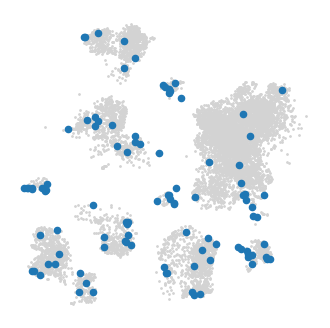

In [46]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ipf, model)

In [47]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00180
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 22 iterations.
CPU times: user 5min 41s, sys: 5min 24s, total: 11min 6s
Wall time: 3min 59s


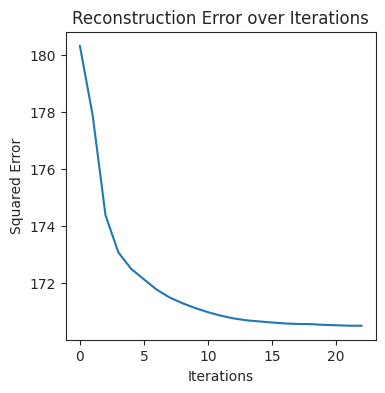

In [48]:
# Check for convergence 
model.plot_convergence()

In [49]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')

/tmp/ipykernel_1364634/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


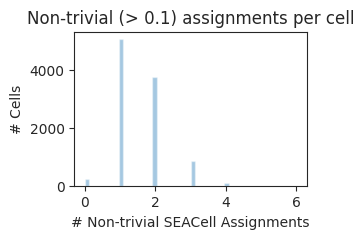

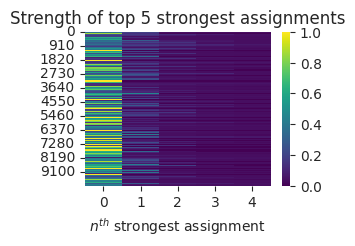

In [50]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [51]:
labels,weights = model.get_soft_assignments()

In [52]:
mean_attn_score_per_seacell = ipf.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

,cell_attn
SEACell,
SEACell-0,0.005783
SEACell-1,0.005829
SEACell-2,0.007129
SEACell-3,0.005206
SEACell-4,0.010850
...,...
SEACell-95,0.004568
SEACell-96,0.005451
SEACell-97,0.006069


In [53]:
SEACell_ad = SEACells.core.summarize_by_SEACell(ipf, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 88.67it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [54]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


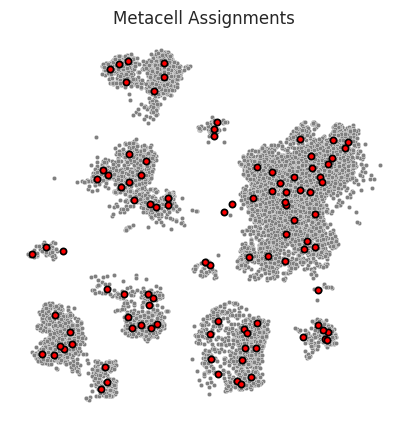

In [55]:
SEACells.plot.plot_2D(ipf, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


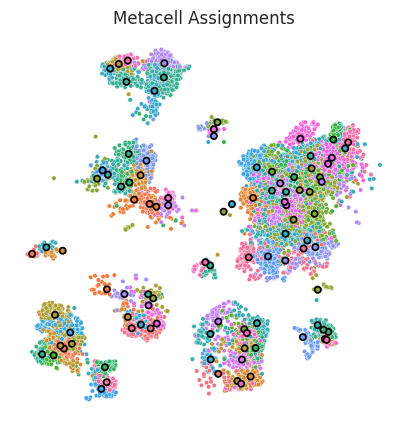

In [56]:
SEACells.plot.plot_2D(ipf, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


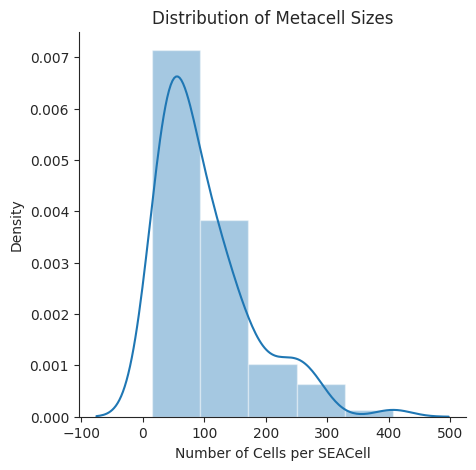

,size
SEACell,
SEACell-0,97
SEACell-1,37
SEACell-2,75
SEACell-3,28
SEACell-4,67
...,...
SEACell-95,84
SEACell-96,159
SEACell-97,69


In [57]:
SEACells.plot.plot_SEACell_sizes(ipf, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


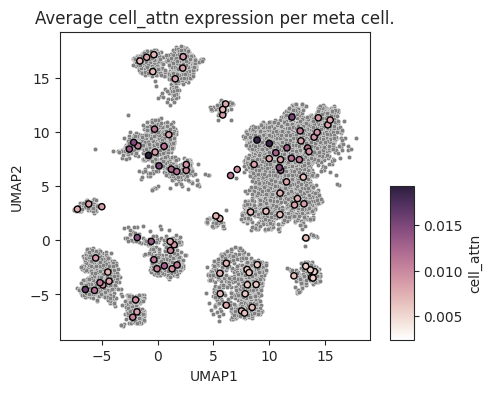

In [58]:
plot_sea_cells(ipf, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


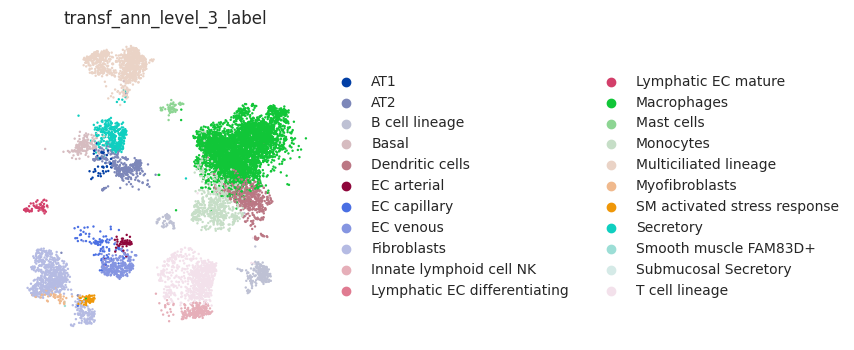

In [59]:
sc.pl.umap(ipf, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [60]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_random_subset10k_seacells.h5ad')

# IPF top 10k with highest attn scores

In [19]:
ipf_top

AnnData object with n_obs × n_vars = 10000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

In [20]:
## User defined parameters

## Core parameters 
n_SEACells = 100
build_kernel_on = 'X' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [21]:
model = SEACells.core.SEACells(
    ipf_top, 
    build_kernel_on=build_kernel_on, 
    n_SEACells=n_SEACells, 
    n_waypoint_eigs=n_waypoint_eigs,
    convergence_epsilon = 1e-5
)

Welcome to SEACells!


In [22]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10000 [00:00<?, ?it/s]

Constructing CSR matrix...


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


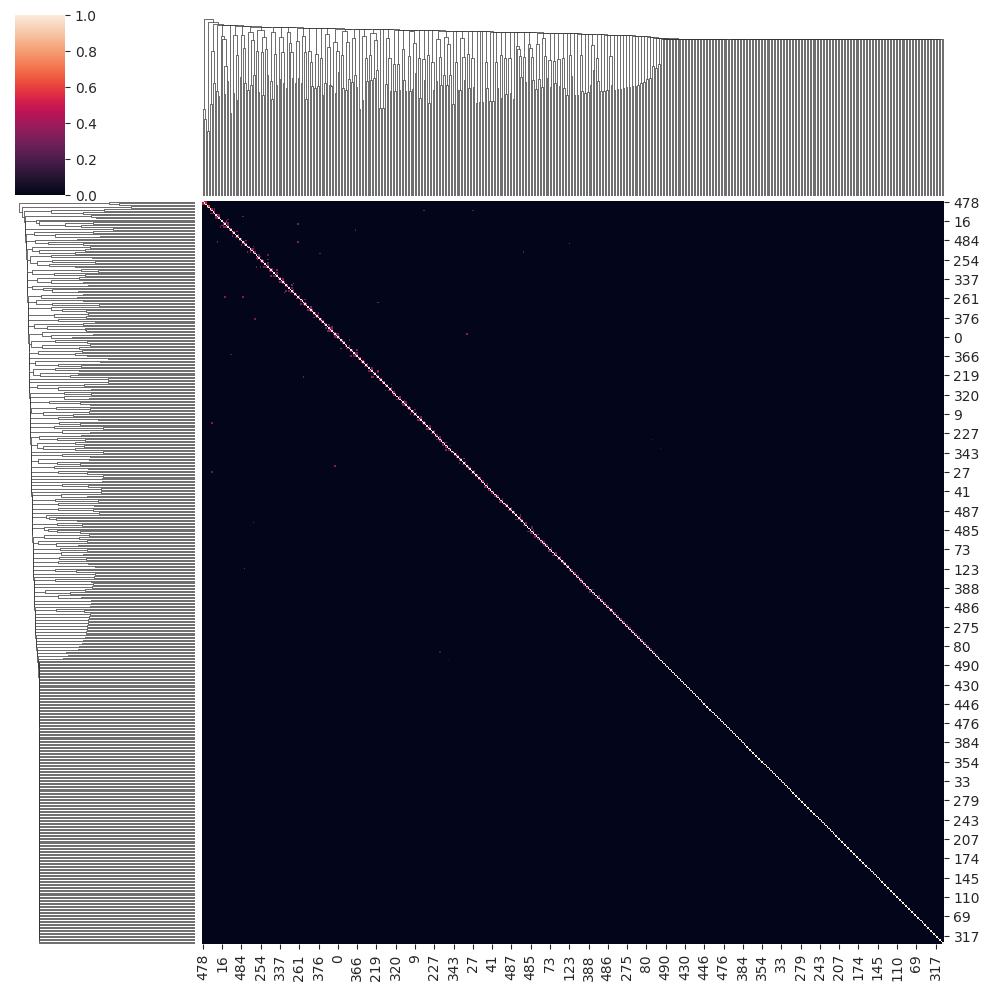

In [23]:
sns.clustermap(M.toarray()[:500,:500])

In [24]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X
Computing diffusion components from X for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 88 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 22/22 [00:00<00:00, 76.67it/s]

Selecting 12 cells from greedy initialization.


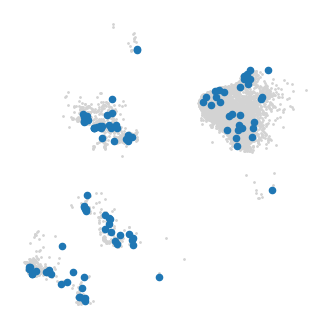

In [25]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(ipf_top, model)

In [26]:
%%time

model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00183
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 36 iterations.
CPU times: user 10min 36s, sys: 8min 48s, total: 19min 25s
Wall time: 7min 51s


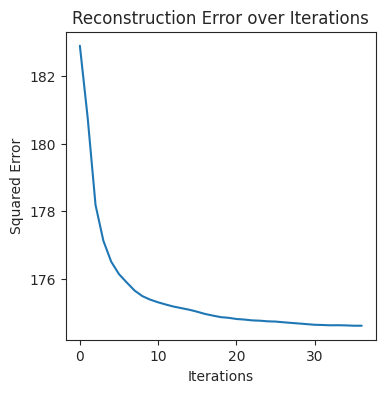

In [27]:
# Check for convergence 
model.plot_convergence()

In [28]:
ipf.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_top10k_seacells.h5ad')

/tmp/ipykernel_510506/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


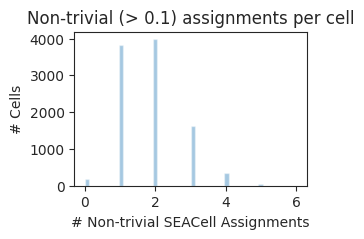

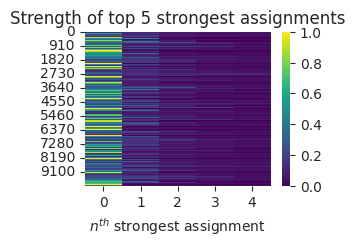

In [29]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [30]:
labels,weights = model.get_soft_assignments()

In [31]:
mean_attn_score_per_seacell = ipf_top.obs[['cell_attn', 'SEACell']].groupby('SEACell').agg('mean')
mean_attn_score_per_seacell

,cell_attn
SEACell,
SEACell-0,0.021864
SEACell-1,0.021636
SEACell-10,0.021501
SEACell-11,0.022469
SEACell-12,0.023468
...,...
SEACell-95,0.021334
SEACell-96,0.022508
SEACell-97,0.021408


In [32]:
SEACell_ad = SEACells.core.summarize_by_SEACell(ipf_top, SEACells_label='SEACell', summarize_layer='X')
SEACell_ad

100%|██████████| 100/100 [00:01<00:00, 59.93it/s]


AnnData object with n_obs × n_vars = 100 × 30
    layers: 'raw'

In [33]:
SEACell_ad.obs = SEACell_ad.obs.join(mean_attn_score_per_seacell)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


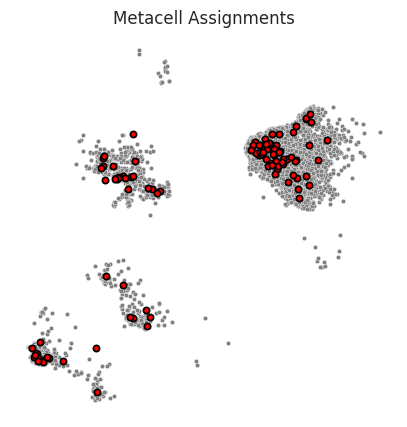

In [34]:
SEACells.plot.plot_2D(ipf_top, key='X_umap', colour_metacells=False)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


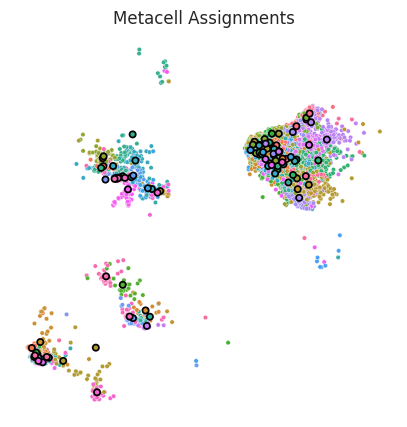

In [35]:
SEACells.plot.plot_2D(ipf_top, key='X_umap', colour_metacells=True)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/SEACells/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


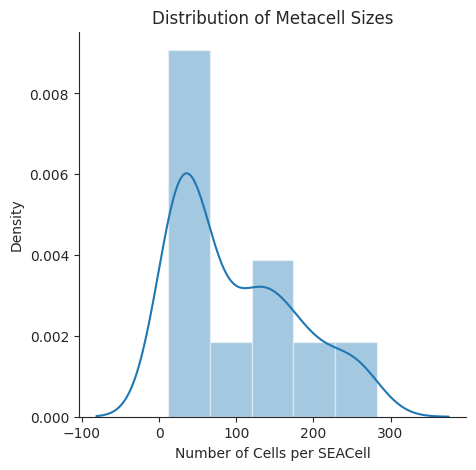

,size
SEACell,
SEACell-0,60
SEACell-1,32
SEACell-10,132
SEACell-11,185
SEACell-12,17
...,...
SEACell-95,39
SEACell-96,42
SEACell-97,33


In [36]:
SEACells.plot.plot_SEACell_sizes(ipf_top, bins=5)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


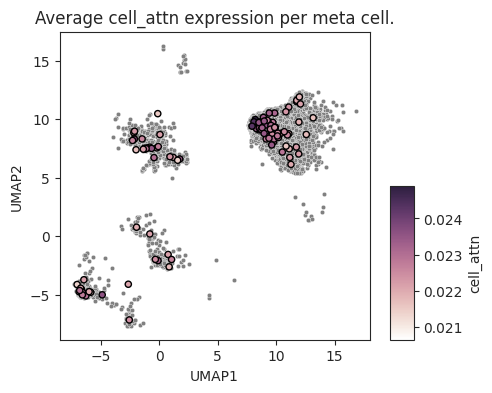

In [37]:
plot_sea_cells(ipf_top, mean_attn_score_per_seacell,'cell_attn')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


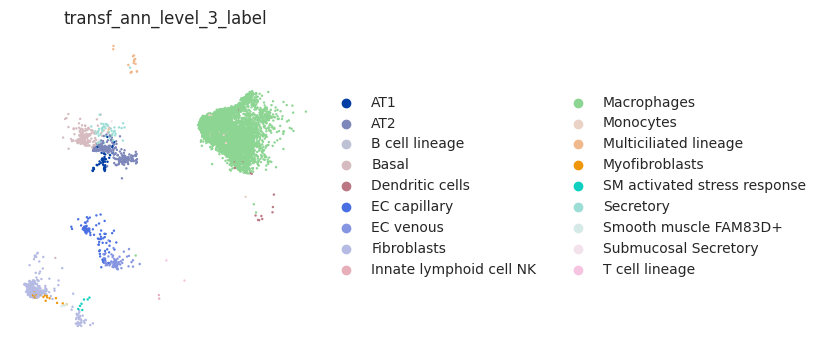

In [38]:
sc.pl.umap(ipf_top, color=['transf_ann_level_3_label'], ncols=1, frameon=False)

In [39]:
ipf_top.write('../data/analysis/hlca_healthy_ipf_embed_balanced/ipf_top10k_seacells.h5ad')